# How well do jobs and skills pay for Data Analysts?

## Methodology
1. **Evaluate median salary for top 7 data jobs**
2. **Find median salary per skill for Data Analysts**
3. **Visualize for highest paying skills and most demanded skills**

### *importing libraries*

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

df_US = df[df['job_country'] == 'United States'].copy()   #filtering US jobs

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 💰 Prepare Salary Data for Job Title Comparison

Before analyzing salary distributions, I prepare the dataset to ensure accurate and meaningful comparisons.

### Steps performed:
1. **Remove missing salary values**  
   Job postings without an annual salary are excluded to avoid skewing results.

2. **Identify the most common job titles**  
   I select the top job titles based on posting frequency to focus the analysis on roles with sufficient data.

3. **Filter the dataset to selected roles**  
   Only job postings belonging to the selected job titles are retained.

4. **Order roles by median salary**  
   Job titles are sorted by median annual salary to improve clarity in salary visualizations.

✅ This preparation ensures that salary comparisons are based on reliable data and representative job roles.


In [9]:
df_US = df_US.dropna(subset= 'salary_year_avg') #removing rows with missing salary_year_avg

# Getting top 6 job titles
top7_jobs_titles = df_US['job_title_short'].value_counts().head(7).index.to_list()

In [10]:
df_US_top7 = df_US[df_US['job_title_short'].isin(top7_jobs_titles)] #filtering to keep only top 6 job titles

# ordering job titles by median salary
top7_jobs_order = df_US_top7.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

## 📦 Salary Distribution of Top Job Titles in the U.S.

This boxplot visualizes the **annual salary distribution** for the **top 7 most common data-related job titles** in the United States.

### What the chart shows:
- Each box represents the salary distribution for a job title
- The median salary highlights typical compensation
- Outliers indicate exceptionally high-paying roles

### Why this matters:
This visualization makes it easy to compare both **typical pay** and **salary variability** across different data roles, highlighting how compensation increases with seniority and specialization.


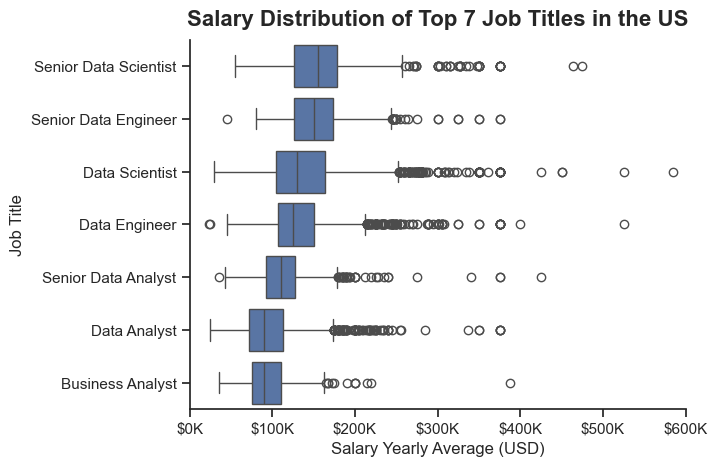

In [11]:
sns.set_style('ticks')
sns.boxplot(data = df_US_top7,
            y ='job_title_short',
            x = 'salary_year_avg',
            order = top7_jobs_order                        #ordering job titles by median salary
            )
sns.despine()
plt.title('Salary Distribution of Top 7 Job Titles in the US',
          fontsize=16, 
          fontweight="bold", 
          pad=10)
plt.xlabel('Salary Yearly Average (USD)')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))        #formatting x-axis in K USD

plt.show()


### Insight
- Salaries increase clearly with seniority across all roles  
- Senior Data Scientist and Senior Data Engineer positions have the highest median pay and widest salary ranges  
- Data Analyst and Business Analyst roles show more consistent and lower salary distributions compared to senior and technical roles  


## Investigate Median Salary Vs Skill for Data Analysts

## 🎯 Filter and Prepare U.S. Data Analyst Data

To focus the analysis on **Data Analyst roles in the United States**, I filter and clean the dataset before examining salary and skill relationships.

### Steps performed:
1. **Filter for U.S. Data Analyst roles**  
   Only job postings with the title *Data Analyst* and located in the United States are retained.

2. **Remove missing salary values**  
   Rows without an annual salary are excluded to ensure accurate salary-based analysis.

3. **Explode the skills column**  
   The `job_skills` column is exploded so that each row represents a single skill, enabling precise skill-level salary analysis.

✅ This preparation ensures that both salary and skill insights are based on clean, consistent, and role-specific data.


In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills') #exploding job_skills column

## 💡 Most In-Demand vs Highest-Paid Skills for Data Analysts

In this section, I analyze Data Analyst skills from two perspectives:  
**demand** (how often a skill appears in job postings) and **pay** (median annual salary associated with the skill).

### Steps performed:

1. **Identify the most in-demand skills**  
   - Group job postings by skill  
   - Count how frequently each skill appears  
   - Calculate the median salary for each skill  
   - Select the top skills based on posting count  

2. **Identify the highest-paid skills**  
   - Group job postings by skill  
   - Calculate the median salary per skill  
   - Select the top skills based on highest median salary  

✅ This comparison highlights which skills are widely requested by employers and which ones are associated with higher compensation, helping identify valuable skills from both a market demand and salary perspective.


# *Identify the most in-demand skills*

In [6]:
df_top_skills_demand = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending=False).head(7)

# Display the top skills demand and median salary
df_top_skills_demand 

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
r,893,92500.0
power bi,838,90000.0


# *Identify the highest-paid skills*

In [7]:
df_top_skills_paid = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending=False).head(7)

# Display the top skills by median salary
df_top_skills_paid

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0


## 📊 Comparing Highest-Paid vs Most In-Demand Skills for Data Analysts

In this section, I compare **skill demand** and **salary potential** for Data Analyst roles using two stacked bar charts.

### What the charts show:

- **Top chart – Highest-Paid Skills**  
  Displays the top 7 skills associated with the **highest median annual salaries** for Data Analysts in the U.S.

- **Bottom chart – Most In-Demand Skills**  
  Displays the top 7 skills that appear **most frequently in job postings**, ranked by demand.

### Why this comparison matters:
This side-by-side visualization highlights the difference between:
- Skills that are **widely requested by employers**
- Skills that are **associated with higher pay**

✅ By comparing both dimensions, this analysis helps identify which skills offer the best balance between **market demand** and **earning potential**, supporting more informed career and learning decisions.


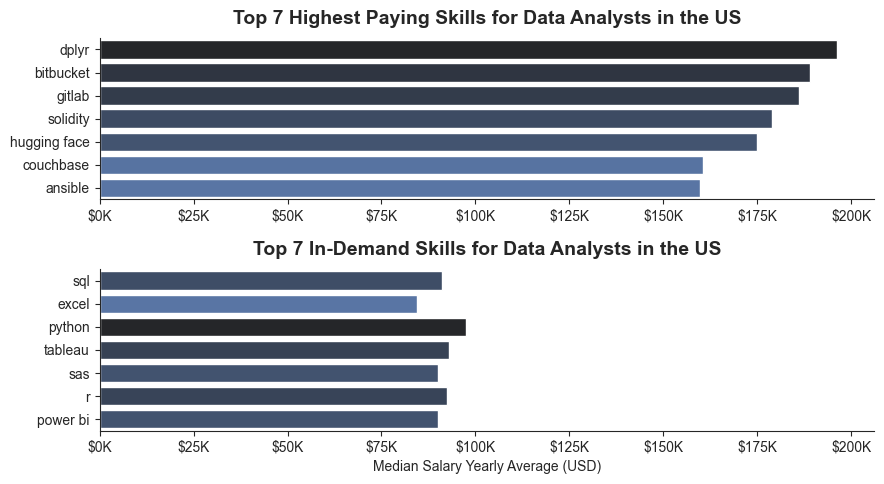

In [8]:
fig , ax = plt.subplots(2, 1)

fig.set_size_inches(9, 5)                 #setting figure size
sns.set_theme(style='ticks')
sns.barplot(data = df_top_skills_paid,
            x = 'median',
            y = 'job_skills',
            ax = ax[0],
            hue='median',
            palette='dark:b_r',
            legend=False
            )

ax[0].set_title('Top 7 Highest Paying Skills for Data Analysts in the US',
                fontsize=14,
                pad = 10,                 
                fontweight="bold",)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))

sns.barplot(data = df_top_skills_demand,
            x = 'median',
            y = 'job_skills',
            ax = ax[1],
            hue='median',
            palette='dark:b_r',
            legend=False
            )
ax[1].set_title('Top 7 In-Demand Skills for Data Analysts in the US',
                fontsize=14,
                pad = 10,                 
                fontweight="bold",)   
ax[1].set_xlabel('Median Salary Yearly Average (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())

sns.despine()            #removing top and right spines

plt.tight_layout()        #adjusting subplots to fit in figure area.

plt.show()

### Insight
- The highest-paying skills are specialized and less common, such as **dplyr**, **GitLab**, and **Bitbucket**, indicating strong salary premiums for niche expertise  
- In-demand skills like **SQL**, **Excel**, and **Python** appear in far more job postings but are associated with lower median salaries  
- There is a clear gap between skills that are **most requested** and those that are **highest paid**, highlighting the value of combining foundational skills with specialized tools to maximize earning potential  
